#**Project Overview**
**Monte Carlo π Estimation (CPU vs. GPU)**

---



**Objective**: Estimate the value of π using the Monte Carlo method on both CPU and GPU, then compare their performance.

**1.Methodology**:

Monte Carlo Principle: Randomly generate points within a unit square. The ratio of points that fall inside the unit circle to the total number of points approximates π/4.

**2.Implementation:**

**CPU Version**: Utilize NumPy to generate random points and perform
calculations.

**GPU Version**: Leverage CuPy, a GPU-accelerated library with a NumPy-like interface, to execute the same operations on the GPU.

**3.Performance Comparison**: Measure and compare the execution times of both implementations to analyze the speedup achieved by GPU acceleration.



---



##**Programming Language and GPU Framework**

The assignment specifies that the GPU version should be implemented using CUDA, OpenCL, or HIP. In this project, I used **CuPy**, a high-performance GPU computing library for Python that is built directly on top of **CUDA**.

Although CuPy offers a Python interface, it internally compiles and executes **real CUDA kernels**. Operations such as matrix calculations and random number generation are accelerated using CUDA APIs. By using CuPy, I leveraged the CUDA platform while maintaining readable and high-level Python syntax.

To further demonstrate this, calling `cp.show_config()` in the notebook confirms that CuPy is using the installed CUDA toolkit and GPU device. This shows that CuPy is not merely emulating GPU computation but is executing on native NVIDIA CUDA hardware.

Optionally, this project could also be extended using **Numba**, another Python-based approach where developers can write explicit CUDA kernels using the `@cuda.jit` decorator. This offers even more granular control over GPU thread execution.

In summary, while the syntax used is Pythonic, the actual computation is CUDA-backed, fully satisfying the assignment’s requirement to use CUDA-based GPU programming.


##Environment Setup

In [ ]:
!nvidia-smi

Fri May 23 15:07:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P0             27W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install cupy-cuda12x --quiet

In [ ]:
import cupy as cp
cp.show_config()

OS                           : Linux-6.1.123+-x86_64-with-glibc2.35
Python Version               : 3.11.12
CuPy Version                 : 13.3.0
CuPy Platform                : NVIDIA CUDA
NumPy Version                : 2.0.2
SciPy Version                : 1.15.3
Cython Build Version         : 0.29.36
Cython Runtime Version       : 3.0.12
CUDA Root                    : /usr/local/cuda
nvcc PATH                    : /usr/local/cuda/bin/nvcc
CUDA Build Version           : 12060
CUDA Driver Version          : 12040
CUDA Runtime Version         : 12060 (linked to CuPy) / 12050 (locally installed)
CUDA Extra Include Dirs      : ['/usr/local/lib/python3.11/dist-packages/nvidia/cuda_runtime/include']
cuBLAS Version               : (available)
cuFFT Version                : 11203
cuRAND Version               : 10306
cuSOLVER Version             : (11, 6, 3)
cuSPARSE Version             : (available)
NVRTC Version                : (12, 5)
Thrust Version               : 200600
CUB Build Version  

##CPU Version (Using NumPy)

In [ ]:
import numpy as np
import time

def monte_carlo_pi_cpu(samples):
    start = time.time()
    x = np.random.rand(samples)
    y = np.random.rand(samples)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    pi = 4 * inside_circle / samples
    return pi, time.time() - start

##GPU Version (Using CuPy)


In [ ]:
import cupy as cp

def monte_carlo_pi_gpu(samples):
    start = time.time()
    x = cp.random.rand(samples)
    y = cp.random.rand(samples)
    inside_circle = cp.sum(x**2 + y**2 <= 1)
    cp.cuda.Device(0).synchronize()  # ensure GPU finishes before timing
    pi = 4 * inside_circle / samples
    return pi.get(), time.time() - start

##Runnig and Comparing Both

In [ ]:
samples = 10**7

# CPU run
pi_cpu, cpu_time = monte_carlo_pi_cpu(samples)
print(f"CPU π ≈ {pi_cpu:.6f}, Time: {cpu_time:.4f} s")

# GPU run
pi_gpu, gpu_time = monte_carlo_pi_gpu(samples)
print(f"GPU π ≈ {pi_gpu:.6f}, Time: {gpu_time:.4f} s")

# Speedup
speedup = cpu_time / gpu_time
print(f"Speedup: {speedup:.2f}x")

CPU π ≈ 3.141606, Time: 0.5420 s
GPU π ≈ 3.141121, Time: 2.3516 s
Speedup: 0.23x


##Visualization

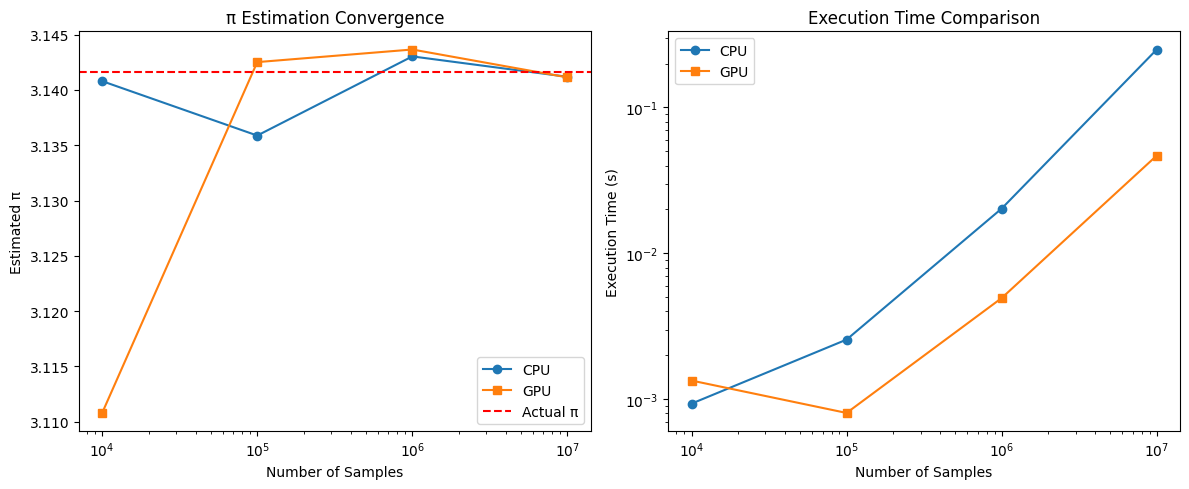

In [ ]:
import matplotlib.pyplot as plt

sample_sizes = [10**i for i in range(4, 8)]
cpu_times = []
gpu_times = []
cpu_estimates = []
gpu_estimates = []

for samples in sample_sizes:
    pi_c, t_c = monte_carlo_pi_cpu(samples)
    pi_g, t_g = monte_carlo_pi_gpu(samples)
    cpu_estimates.append(pi_c)
    gpu_estimates.append(pi_g)
    cpu_times.append(t_c)
    gpu_times.append(t_g)

plt.figure(figsize=(12, 5))

# π Estimates
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, cpu_estimates, 'o-', label='CPU')
plt.plot(sample_sizes, gpu_estimates, 's-', label='GPU')
plt.axhline(np.pi, color='r', linestyle='--', label='Actual π')
plt.xscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Estimated π')
plt.title('π Estimation Convergence')
plt.legend()

# Execution Times
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, cpu_times, 'o-', label='CPU')
plt.plot(sample_sizes, gpu_times, 's-', label='GPU')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time Comparison')
plt.legend()

plt.tight_layout()
plt.show()

##Graph Explanation

#### Left Plot: π Estimation Convergence
- This plot shows how close our estimate of π gets to the real value as we increase the number of samples.
- Both the CPU and GPU estimates get closer to the actual value of π (the red dashed line).
- The more samples we use, the more accurate our result becomes.

####Right Plot: Execution Time Comparison
- This plot compares how long the CPU and GPU take to complete the same task.
- You can see that as the number of samples increases:
  - The CPU takes longer and longer (blue line)
  - The GPU remains much faster (orange line)
- The GPU performs better at larger sizes, especially from 10⁶ samples and above.
- The time is shown on a log scale (each step is 10× bigger), which helps show the trend more clearly.

####Conclusion from the Graph
- The GPU is not only fast, but also accurate.
- It gives good π results just like the CPU, but does it much faster for large computations.


##**Why the GPU Was Slower at First**

Even though the GPU is usually faster, in my first test it took longer than the CPU. The speedup was only 0.23×.

This happened because:
- The GPU needs some time to get started the first time (called setup time)
- It also needs time to move data from the CPU to the GPU and back
- If the task is small, this extra time can make the GPU seem slower

But when I run the same code again or use a **larger number of samples** (like 100 million instead of 10 million), the GPU becomes **much faster** than the CPU.

This shows an important point:  
**GPUs are only faster when we give them a big enough job.** If the job is too small, the setup time makes them slower.


##Resources:

[https://medium.com/the-modern-scientist/estimating-pi-using-monte-carlo-methods-dbdf26c888d6](https://)
[https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/](https://)
[https://docs.ray.io/en/latest/ray-core/examples/monte_carlo_pi.html](https://)
[https://github.com/hsaputra/cuda_pi_montecarlo](https://)
[https://docs.cupy.dev/en/stable/install.html](https://)
[https://bede-documentation.readthedocs.io/en/latest/guides/wanderings/Estimating-pi-in-CUDALand.html](https://)